In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [46]:
df = pd.read_csv('CHEMBL3344_bioactivity_data_3class_pIC50.csv')

In [47]:
#drop PIC50 to use it as the "y" in the matrix
X = df.drop('pIC50', axis = 1)
X.head()

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Y = df.pIC50
Y.head()

0    4.769551
1    4.000000
2    4.000000
3    4.000000
4    4.000000
Name: pIC50, dtype: float64

In [49]:
X.shape

(53, 882)

In [50]:
Y.shape

(53,)

In [51]:
#remove values with low variance
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)
X.shape

(53, 140)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [63]:
X_train.shape, Y_train.shape

((42, 140), (42,))

In [64]:
X_test.shape, Y_test.shape

((11, 140), (11,))

In [65]:
#simple reg model
np.random.seed(100)
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train,Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.11408455328470146

In [69]:
Y_pred = model.predict(X_test)

In [70]:
Y_pred

array([5.29212407, 4.78044038, 3.68120995, 4.98753501, 5.3959541 ,
       4.33051024, 3.5709934 , 4.9148058 , 4.17159307, 5.44228334,
       2.72581507])

In [72]:
test = Y_pred

In [71]:
Y_test

37    2.000000
8     6.397940
27    6.134896
14    5.000000
17    7.468521
1     4.000000
35    3.614394
13    5.000000
28    6.134896
40    6.638272
32    3.649752
Name: pIC50, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

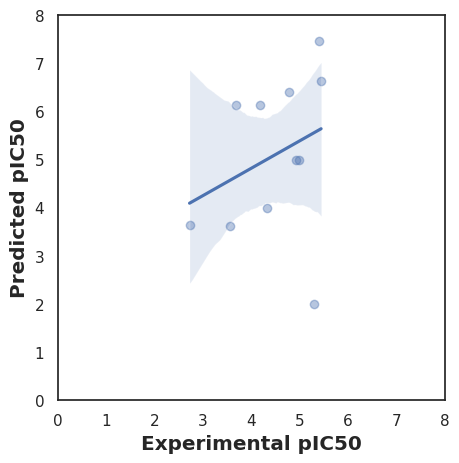

In [78]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_pred, y = Y_test, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.figure.set_size_inches(5, 5)
plt.show